In [1]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
W_l1 = weight_variable([1, 20])
B_l1 = bias_variable([20])
    
W_o = weight_variable([20, 1])
B_o = weight_variable([1])

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def bipolar_sigmoid(z):
    return (1 - tf.exp(-1.0 *z))/(1 + tf.exp(-1.0 *z))
    
def sine_ann_model(x):
    #input_layer
    input_layer = tf.reshape(x, [-1, 1])
    
    # hidden_layer_1
    hl1 = bipolar_sigmoid(tf.matmul(input_layer, W_l1) + B_l1)
    # output_layer
    output_layer = bipolar_sigmoid(tf.matmul(hl1, W_o) + B_o)
    return output_layer

In [27]:
import math
def generate_sine_model_data(test_size = 0.3):
    dataset = []
    for x in np.arange(-1.0 * (math.pi), (math.pi), 0.05):
        dataset.append([[x], [math.sin(x)]])
        
    random.shuffle(dataset)
    dataset = np.array(dataset)

    # split a portion of the features into tests
    testing_size = int(test_size*len(dataset))

    # create train and test lists
    train_x = list(dataset[:,0][:-testing_size])
    train_y = list(dataset[:,1][:-testing_size])
    test_x = list(dataset[:,0][-testing_size:])
    test_y = list(dataset[:,1][-testing_size:])

    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = generate_sine_model_data()

('Epoch', 0, 'completed out of', 2000, 'cost:', 0.11883608)
('Epoch', 400, 'completed out of', 2000, 'cost:', 0.0025042749)
('Epoch', 800, 'completed out of', 2000, 'cost:', 0.0025574027)
('Epoch', 1200, 'completed out of', 2000, 'cost:', 0.0024024302)
('Epoch', 1600, 'completed out of', 2000, 'cost:', 0.0019419065)
('Accuracy:', 0.00090599043)


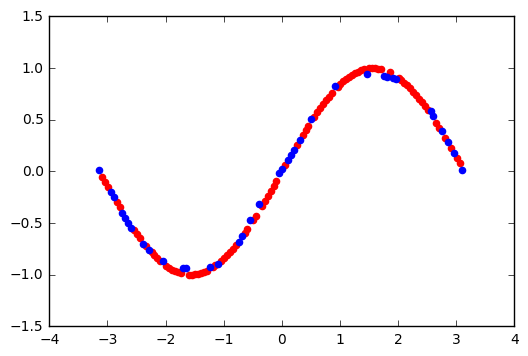

In [31]:
x = tf.placeholder('float')
y = tf.placeholder('float')
epochs = 2000
batch_size = 10
def train_ann_sine_function(x):
    prediction = sine_ann_model(x)
    
    cost = tf.reduce_mean(tf.square(prediction - y))
    
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(cost)
    
    with tf.Session() as sess:
        summary_writer = tf.summary.FileWriter('log_ANN_graph', sess.graph)
        # initialize our variables
        sess.run(tf.global_variables_initializer())

        # loop through specified number of iterations
        for epoch in range(epochs):
            epoch_loss = 0
            i=0
            # handle batch sized chunks of training data
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
                last_cost = c

            # print cost updates along the way
            if (epoch% (epochs/5)) == 0:
                print('Epoch', epoch, 'completed out of',epochs,'cost:', last_cost)
        
        # print accuracy of our model
        accuracy = tf.reduce_mean(tf.square(prediction - y))
        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))

        output_weight = sess.run(W_o)
        #output_bias = sess.run(output_layer['bias'])
        
        # print predictions using our model
        test_pred = []
        for i,t in enumerate(test_x):
            output = prediction.eval(feed_dict = {x: [test_x[i]]})
            # normalize the prediction values
            test_pred.append(output[0][0])
        plt.scatter(train_x, train_y, color='r')
        plt.scatter(test_x, test_pred, color='b')
        plt.show()
        return output_weight
        
output_weight = train_ann_sine_function(x)

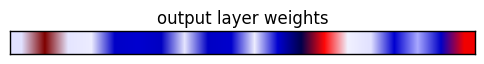

In [32]:
plt.title('output layer weights')
plt.imshow(output_weight.reshape([1, 20]), cmap=plt.get_cmap('seismic'))
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False) 
plt.show()